### Predicting stock prices with Facebook's prediction tool: fbprophet
---

In [1]:
import pandas_datareader as reader
import datetime as dt
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

### GOOG price forecast
---

In [2]:
# Get thirty years of history
end_date = dt.datetime.now()
start_date = dt.datetime(end_date.year - 20, end_date.month, end_date.day)

In [3]:
print("Start Date:",start_date)
print("End Date:",end_date)

Start Date: 2002-05-06 00:00:00
End Date: 2022-05-06 11:07:44.910353


In [4]:
df = reader.get_data_yahoo('GOOG', start_date, end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


Call Prophet Library here

In [5]:
from fbprophet import Prophet

/Users/hyperion/opt/miniconda3/envs/quantcrypto/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [6]:
# Create a new Prophet model
model = Prophet()

In [7]:
# This returns a forecaster object
model

In [8]:
# Need to reset index so that it's a column
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [9]:
# Prophet expects two new columns: 'ds' and 'y'
# Set them equal to 'Date' and 'Adj Close'

df[['ds', 'y']] = df[['Date', 'Adj Close']]
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655,2004-08-19,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770,2004-08-20,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735,2004-08-23,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197,2004-08-24,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086,2004-08-25,52.802086


In [10]:
# Fit the Prophet model to the dataframe
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -93.8021


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11389.2     0.0223168        1261.8      0.8551      0.8551      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11671.5     0.0734184       5617.61           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11750.6      0.187131       3278.53           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11798.4     0.0174299       1189.38           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11826.8     0.0163071       746.704       0.918       0.918      569   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599    

In [11]:
# Define the future time horizon
# In this case lets look at GOOG price in one year
future = model.make_future_dataframe(periods=365)

In [12]:
forecast = model.predict(future)

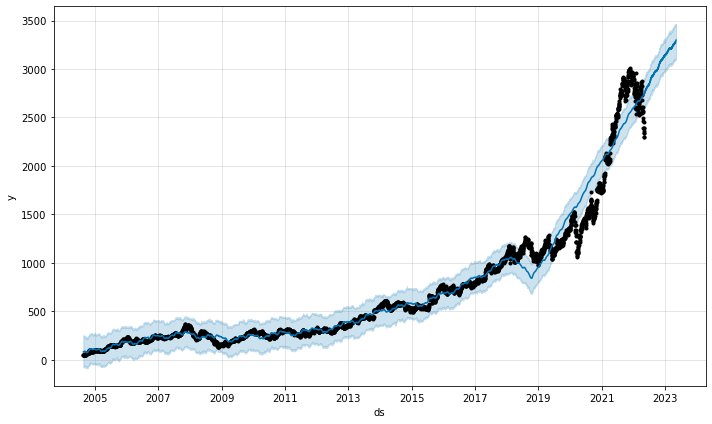

In [13]:
model.plot(forecast)
plt.show()

### TSLA Price Forecast
---

In [14]:
import pandas_datareader as reader
import datetime as dt
import matplotlib.pyplot as plt
import warnings

from fbprophet import Prophet

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -128.335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7799.5    0.00177455       1949.58      0.2143      0.2143      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7898.44     0.0148624       1420.51           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7940.14    0.00137704       384.979      0.3763      0.3763      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       7946.83   0.000336314       354.681   1.351e-06       0.001      432  LS failed, Hessian reset 
     399       7953.24     0.0189538       346.399           1           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7956.64   0.000576774    

0

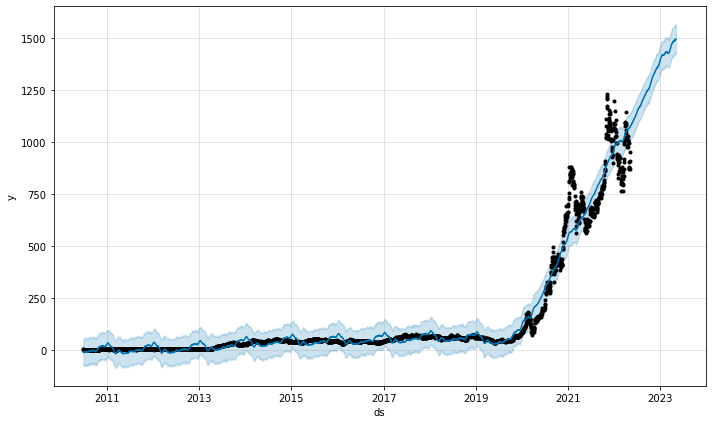

In [18]:
# Rolling all of the above into a single function
def price_forecast_model(ticker, end=dt.datetime.now(), days=365):
    # Specify start and end dates and load in dataframe
    start = dt.datetime(end.year - 20, end.month, end.day)
    df = reader.get_data_yahoo(ticker, start, end)
    
    # Instantiate Prophet Model
    model = Prophet()

    # Reset index - required for Prophet
    df = df.reset_index()
    # Setup two new parameters required for Prophet
    df[['ds', 'y']] = df[['Date', 'Adj Close']]

    # Fit the Prophet Model to the DataFrame
    model.fit(df)
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    model.plot(forecast)

price_forecast_model('TSLA')